In [1]:
from __future__ import print_function, unicode_literals, division

import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('axes', linewidth=2)

fs_axlabel = 12
fw_axlabel = 'bold'

In [2]:
df = pd.read_csv('sent.csv', index_col='idx')

df = df.dropna(how='any', subset=['date'])

#for name in df['from'].unique():
#    print(name, len(df[df['from'] == name]))

df = df[df['from'] == 'jeff.dasovich@enron.com']


print('\nEmails: {}'.format(len(df)))


dt = [x[:-6] for x in df['date']]
tz = [x[-6:] for x in df['date']]

tz = [x.replace(':','') for x in tz]

dates = []

for x in df.date:
    
    dt = x[:-6]
    tz = x[-6:].replace(':','')
    
    hour = int(dt[-8:-6])
    zone = int(tz[2])
    
    loc_hr = hour + zone
    
    loc_hr %= 24
    
    dt = '{}{:02d}{}'.format(dt[:-8], loc_hr, dt[-6:])
    
    dtz = '{} {}'.format(dt, tz)
    
    dates.append(datetime.strptime(dtz, '%Y-%m-%d %H:%M:%S %z'))

df['dt']  = dates

df['tz']  = [x.tzinfo for x in dates]

df['utc'] = [x.time() for x in dates]
    
df['day'] = [x.weekday() for x in dates]


Emails: 3926


### Day of the week

What days of the week are most emails sent?

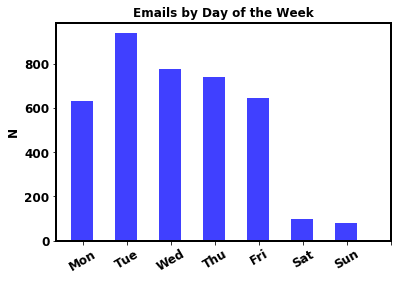

In [3]:
fig0, ax0 = plt.subplots(1, 1, figsize=(6,4))

ax = ax0

nbins = 7

n, bins, patches = ax.hist(df['day'], nbins, facecolor='blue', rwidth=0.5, alpha=0.75)

ax.set_xticks(bins+0.45)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=30)

ax.set_title('Emails by Day of the Week', fontsize=fs_axlabel, fontweight=fw_axlabel)
ax.set_ylabel('N', fontsize=fs_axlabel, fontweight=fw_axlabel)



for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')

plt.savefig('figs/day_of_week.png', format='png', dpi=72)

plt.show()

### Time of the day (UTC)

What time of the day are emails typically sent? Need to convert to PST and correct for DST...

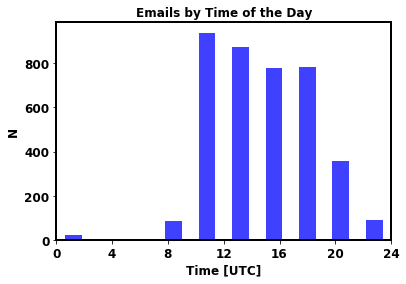

In [4]:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

ax = ax1

nbins = 10

n, bins, patches = ax.hist(df['utc'], nbins, facecolor='blue', rwidth=0.5, alpha=0.75)


ax.set_xlim(0,24*3600)

xt = [x * 3600 for x in range(0, 25, 4)]
yt = ['{}'.format(x) for x in range(0, 25, 4)]

ax.set_xticks(xt)
ax.set_xticklabels(yt,
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=0)

#ax.set_xlim(datetime.time(0,0,0,0), datetime.time(23,59,59,999999))

ax.set_xlabel('Time [UTC]', fontsize=fs_axlabel, fontweight=fw_axlabel)
ax.set_ylabel('N', fontsize=fs_axlabel, fontweight=fw_axlabel)

ax.set_title('Emails by Time of the Day', fontsize=fs_axlabel, fontweight=fw_axlabel)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')

plt.savefig('figs/time_of_day.png', format='png', dpi=72)

plt.show()

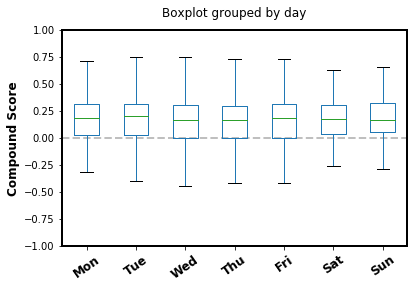

In [5]:
fig3, ax3 = plt.subplots(1, 1, figsize=(6,4))

ax = ax3

ax.axhline(0, color='grey', alpha=0.5, linewidth=2, linestyle='--')

boxplot = df.boxplot(ax=ax, column=['body_comp'], by='day', grid=False,
                     showfliers=False)

ax.set_xlabel(None)

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=35)

ax.set_ylim(-1,1)

ax.set_ylabel('Compound Score', fontsize=fs_axlabel, fontweight=fw_axlabel)

ax.set_title(None)

plt.savefig('figs/boxplot_tone_by_day.png', format='png', dpi=72)

plt.show()